#**Unsupervised pre-training vs CNN**

*Students:* --Valentina Barletta (Deep Learning) valentina.barletta@edu.unito.it --Sara De Benedetti (Reti Neurali) sara.debenedetti493@edu.unito.it

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#model_path = '/content/drive/MyDrive/Progetto Deep/Data/model.pth'
#path_mount = '/content/drive/'

#from google.colab import drive
#drive.mount('/content/drive')

#subject = 'EncoderWithSoftmax'

Importo i file

In [3]:
accuracy_fashion_sparse = np.load("ACCURACY_matrix_FashionMNIST_sparse.npy")
#train_loss_fashion_sparse = np.load("TrainLOSS_matrix_FashionMNIST_sparse_vs1.npy")

accuracy_mnist_normal = np.load("ACCURACY_matrix_MNIST_normal.npy")
#train_loss_mnist_normal = np.load("TrainLOSS_matrix_MNIST_normal.npy")

accuracy_mnist_sparse = np.load("ACCURACY_matrix_model_sparse.npy")
#train_loss_mnist_sparse = np.load("TrainLOSS_matrix_model_sparse.npy")

accuracy_CNN = np.load("ACCURACY_matrix_MNIST_normal_CNN.npy")
#train_loss_CNN = np.load("TrainLOSS_matrix_MNIST_normal_CNN.npy")

accuracy_0 = np.load("ACCURACY_matrix_MNIST_normal_NA.npy")
#train_loss_0 = np.load("TrainLOSS_matrix_MNIST_normal_NA.npy")


In [4]:
def last_non_zero(lst):
    i = 0
    for item in lst:
        if item == 0:
            return lst[i - 1]
        i += 1
    return lst[-1]

In [5]:
# Function to calculate the moving average
def moving_average(values, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(values, weights, mode='valid')

In [6]:
# Extract last non-zero values from each list
acc_fashion = [last_non_zero(sublist) for sublist in accuracy_fashion_sparse]
acc_mnist_n = [last_non_zero(sublist) for sublist in accuracy_mnist_normal]
acc_mnist_s = [last_non_zero(sublist) for sublist in accuracy_mnist_sparse]
acc_cnn = [last_non_zero(sublist) for sublist in accuracy_CNN]
acc_0 = [last_non_zero(sublist) for sublist in accuracy_0]

In [7]:
# Calculate moving average
window_size = 3
#moving_avg = moving_average(last_non_zero_values, window_size)

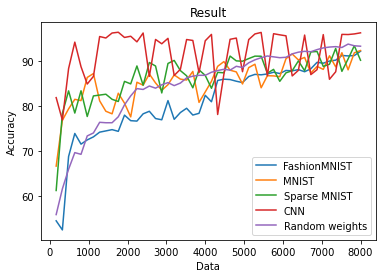

In [9]:
ratio = 50
n_train = 8000
# The size of the dataset
data = [n_train * i/ratio for i in range(1, ratio + 1)]
data_mavg = data[window_size - 1:]

# Plot the moving average
#plt.plot(data_mavg, moving_avg, label=f'Moving Average (window={window_size})', marker='x')

# Plot the values
plt.plot(data, acc_fashion, label = "FashionMNIST")
plt.plot(data, acc_mnist_n, label = "MNIST")
plt.plot(data, acc_mnist_s, label = "Sparse MNIST")
plt.plot(data, acc_cnn, label = "CNN")
plt.plot(data, acc_0, label = "Random weights")

plt.xlabel("Data")
plt.ylabel("Accuracy")
plt.title('Result')
plt.legend()
plt.show()